In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r"C:\Users\sandi\OneDrive\Documents\global internet user.csv")

# Exploratory Data Analysis and Data Cleaning

In [3]:
df.head()

,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
0,Afghanistan,AFG,1980,0.0,0.0,0,0.0
1,Afghanistan,AFG,1981,0.0,0.0,0,0.0
2,Afghanistan,AFG,1982,0.0,0.0,0,0.0
3,Afghanistan,AFG,1983,0.0,0.0,0,0.0
4,Afghanistan,AFG,1984,0.0,0.0,0,0.0


In [4]:
df.shape

(8867, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8867 entries, 0 to 8866
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Entity                  8867 non-null   object 
 1   Code                    8867 non-null   object 
 2   Year                    8867 non-null   int64  
 3   Cellular Subscription   8867 non-null   float64
 4   Internet Users(%)       8867 non-null   float64
 5   No. of Internet Users   8867 non-null   int64  
 6   Broadband Subscription  8867 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 485.0+ KB


In [6]:
duplicate_rows = df[df.duplicated()]
print("number of duplicated row:", duplicate_rows.shape)

number of duplicated row: (0, 7)


In [7]:
unique_value = df['Code'].unique()
print(unique_value )

['AFG' 'ALB' 'DZA' 'ASM' 'AND' 'AGO' 'ATG' 'ARG' 'ARM' 'ABW' 'AUS' 'AUT'
 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU' 'BTN' 'BOL'
 'BIH' 'BWA' 'BRA' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'KHM' 'CMR' 'CAN' 'CPV'
 'CYM' 'CAF' 'TCD' 'CHL' 'CHN' 'COL' 'COM' 'COG' 'CRI' 'CIV' 'HRV' 'CUB'
 'CUW' 'CYP' 'CZE' 'COD' 'DNK' 'DJI' 'DMA' 'DOM' 'Region' 'ECU' 'EGY'
 'SLV' 'GNQ' 'ERI' 'EST' 'SWZ' 'ETH' 'FRO' 'FJI' 'FIN' 'FRA' 'PYF' 'GAB'
 'GMB' 'GEO' 'DEU' 'GHA' 'GIB' 'GRC' 'GRL' 'GRD' 'GUM' 'GTM' 'GIN' 'GNB'
 'GUY' 'HTI' 'HND' 'HKG' 'HUN' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'ISR'
 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN' 'KIR' 'OWID_KOS' 'KWT' 'KGZ' 'LAO'
 'LVA' 'LBN' 'LSO' 'LBR' 'LBY' 'LIE' 'LTU' 'LUX' 'MAC' 'MDG' 'MWI' 'MYS'
 'MDV' 'MLI' 'MLT' 'MHL' 'MRT' 'MUS' 'MEX' 'FSM' 'MDA' 'MCO' 'MNG' 'MNE'
 'MAR' 'MOZ' 'MMR' 'NAM' 'NRU' 'NPL' 'NLD' 'NCL' 'NZL' 'NIC' 'NER' 'NGA'
 'PRK' 'MKD' 'MNP' 'NOR' 'OMN' 'PAK' 'PLW' 'PSE' 'PAN' 'PNG' 'PRY' 'PER'
 'PHL' 'POL' 'PRT' 'PRI' 'QAT' 'ROU' 'RUS' 'RWA' 'KNA' 

In [8]:

#Seprate the World and the Region from the dataset
World_df = df[df['Code'].str.contains('OWID_WRL')]
Region_df = df[df['Code'].str.contains('Region')]

df = df[~df['Code'].isin(['OWID_WRL', 'Region'])].copy()

In [9]:
unique_value = df['Code'].unique()
print(unique_value)                                          

['AFG' 'ALB' 'DZA' 'ASM' 'AND' 'AGO' 'ATG' 'ARG' 'ARM' 'ABW' 'AUS' 'AUT'
 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU' 'BTN' 'BOL'
 'BIH' 'BWA' 'BRA' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'KHM' 'CMR' 'CAN' 'CPV'
 'CYM' 'CAF' 'TCD' 'CHL' 'CHN' 'COL' 'COM' 'COG' 'CRI' 'CIV' 'HRV' 'CUB'
 'CUW' 'CYP' 'CZE' 'COD' 'DNK' 'DJI' 'DMA' 'DOM' 'ECU' 'EGY' 'SLV' 'GNQ'
 'ERI' 'EST' 'SWZ' 'ETH' 'FRO' 'FJI' 'FIN' 'FRA' 'PYF' 'GAB' 'GMB' 'GEO'
 'DEU' 'GHA' 'GIB' 'GRC' 'GRL' 'GRD' 'GUM' 'GTM' 'GIN' 'GNB' 'GUY' 'HTI'
 'HND' 'HKG' 'HUN' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'ISR' 'ITA' 'JAM'
 'JPN' 'JOR' 'KAZ' 'KEN' 'KIR' 'OWID_KOS' 'KWT' 'KGZ' 'LAO' 'LVA' 'LBN'
 'LSO' 'LBR' 'LBY' 'LIE' 'LTU' 'LUX' 'MAC' 'MDG' 'MWI' 'MYS' 'MDV' 'MLI'
 'MLT' 'MHL' 'MRT' 'MUS' 'MEX' 'FSM' 'MDA' 'MCO' 'MNG' 'MNE' 'MAR' 'MOZ'
 'MMR' 'NAM' 'NRU' 'NPL' 'NLD' 'NCL' 'NZL' 'NIC' 'NER' 'NGA' 'PRK' 'MKD'
 'MNP' 'NOR' 'OMN' 'PAK' 'PLW' 'PSE' 'PAN' 'PNG' 'PRY' 'PER' 'PHL' 'POL'
 'PRT' 'PRI' 'QAT' 'ROU' 'RUS' 'RWA' 'KNA' 'LCA' 'VC

In [10]:
unique_value = Region_df['Entity'].unique()
print(unique_value)

['East Asia and Pacific' 'Europe and Central Asia' 'European Union'
 'High income' 'Latin America and Caribbean' 'Low and middle income'
 'Low income' 'Lower middle income' 'Middle East and North Africa'
 'Middle income' 'North America' 'South Asia' 'Sub-Saharan Africa'
 'Upper middle income']


In [11]:
# Value that we want to seprate from the entity coloumns
unwanted_value =['High income','Low and middle income','Low income','Lower middle income','Middle income', 'Upper middle income']
#Create a new dataframe to manage the unwanted income value
income_df = Region_df[Region_df['Entity'].isin(unwanted_value)].copy()
# Drop the  row containing the desired values from the'Entity' columns
Region_df = Region_df[~Region_df['Entity'].isin(unwanted_value)].copy()

In [12]:
unique_value = income_df['Entity'].unique()
print(unique_value)

['High income' 'Low and middle income' 'Low income' 'Lower middle income'
 'Middle income' 'Upper middle income']


In [13]:
unique_value = Region_df['Entity'].unique()
print(unique_value)


['East Asia and Pacific' 'Europe and Central Asia' 'European Union'
 'Latin America and Caribbean' 'Middle East and North Africa'
 'North America' 'South Asia' 'Sub-Saharan Africa']


# Users around the World

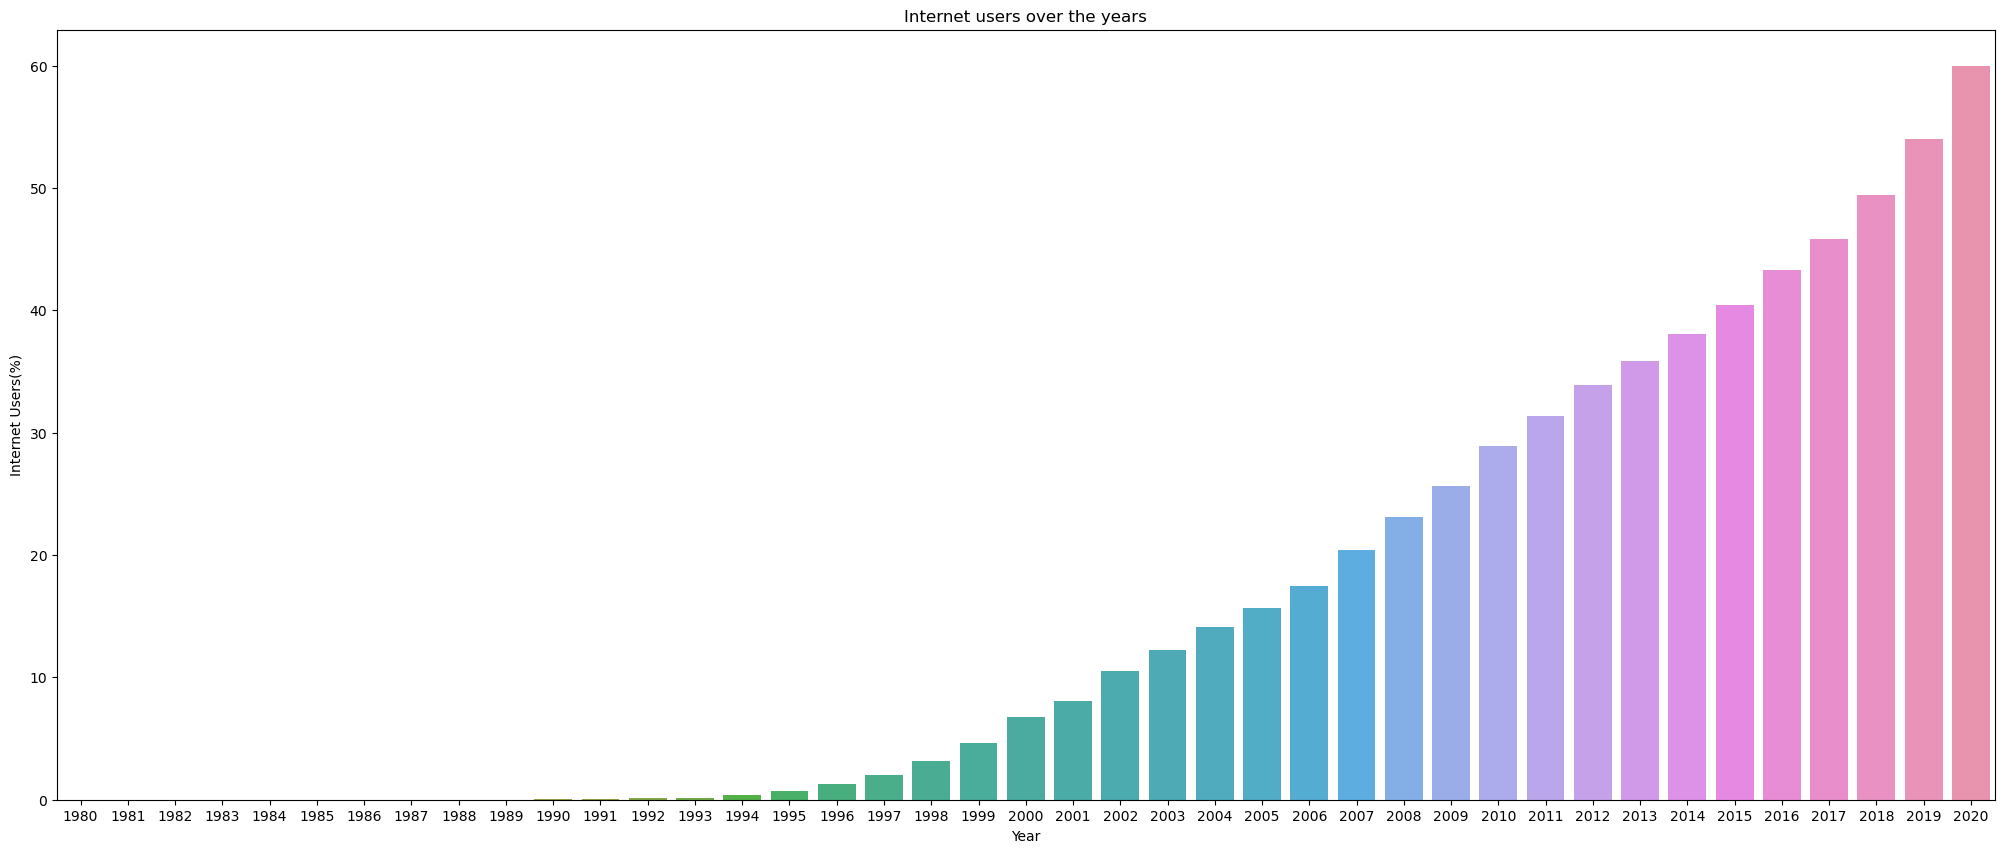

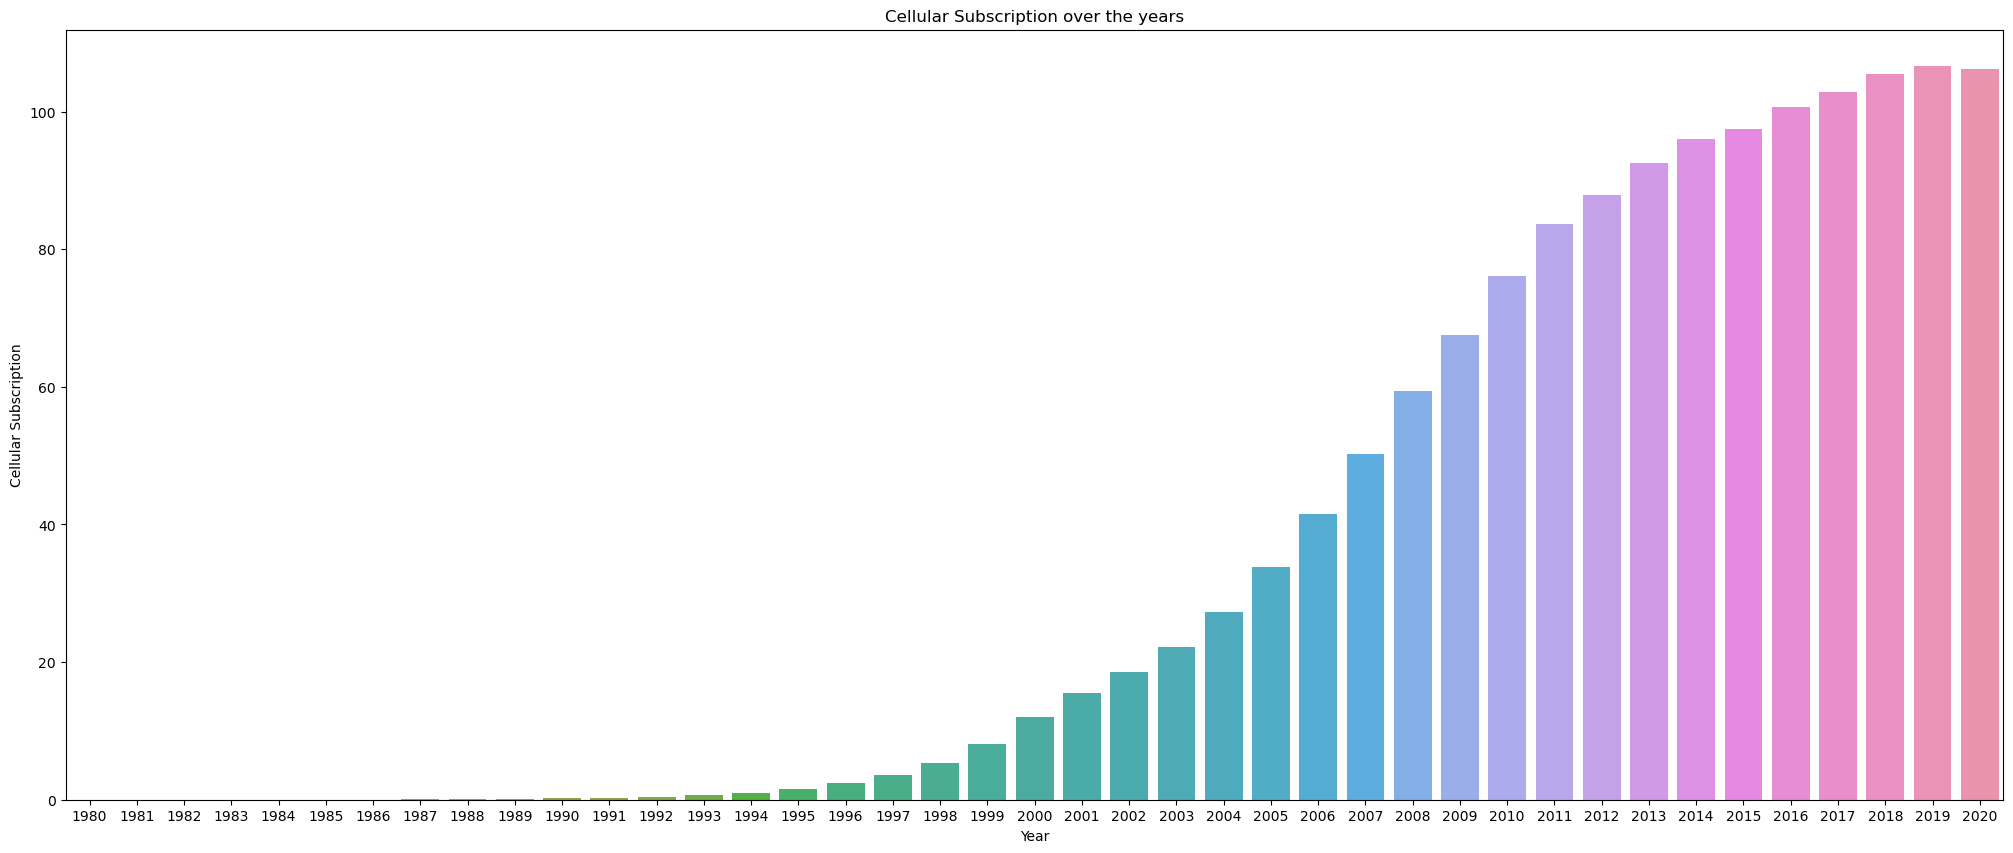

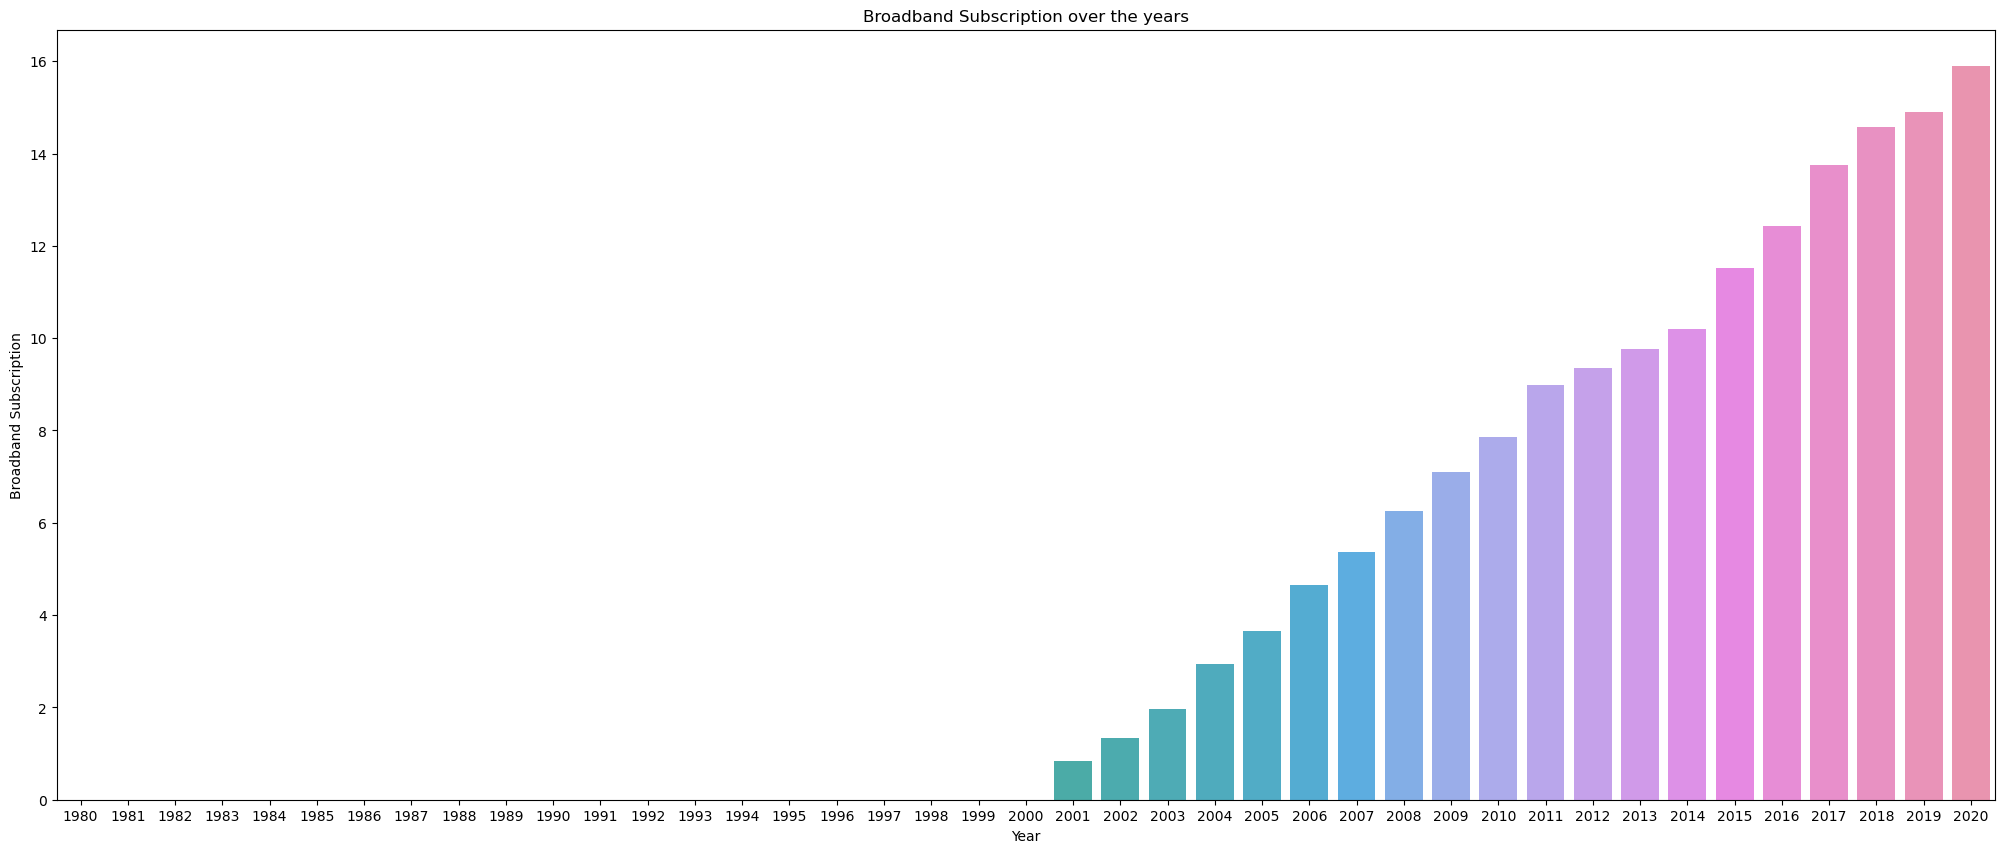

In [14]:
plt.figure(figsize=(25,10))
sns.barplot(data = World_df , x= 'Year', y='Internet Users(%)')
plt.title('Internet users over the years')
plt.show()

plt.figure(figsize=(25,10))
sns.barplot(data = World_df , x= 'Year', y='Cellular Subscription')
plt.title('Cellular Subscription over the years')
plt.show()

plt.figure(figsize=(25,10))
sns.barplot(data = World_df , x= 'Year', y='Broadband Subscription')
plt.title('Broadband Subscription over the years')
plt.show()

In [142]:
# Users in different Region

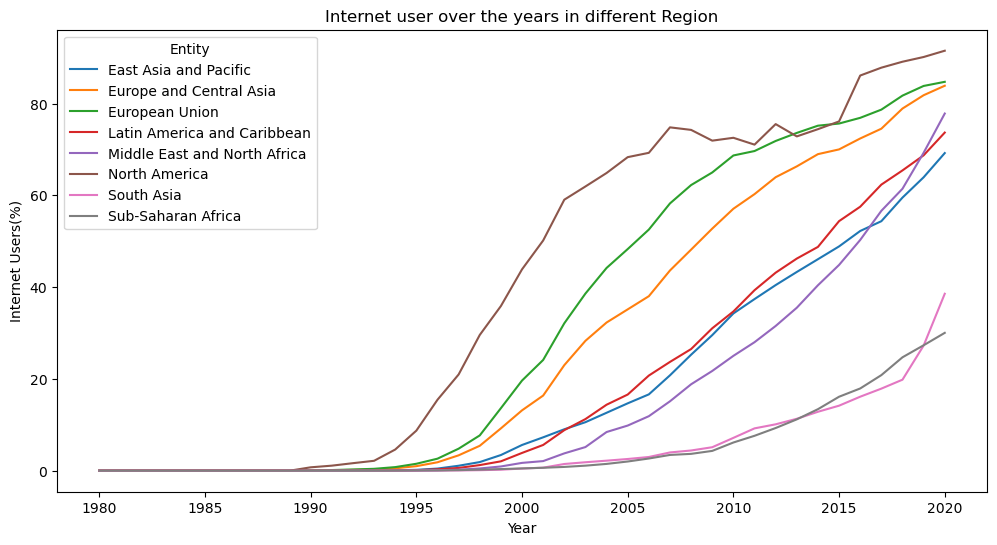

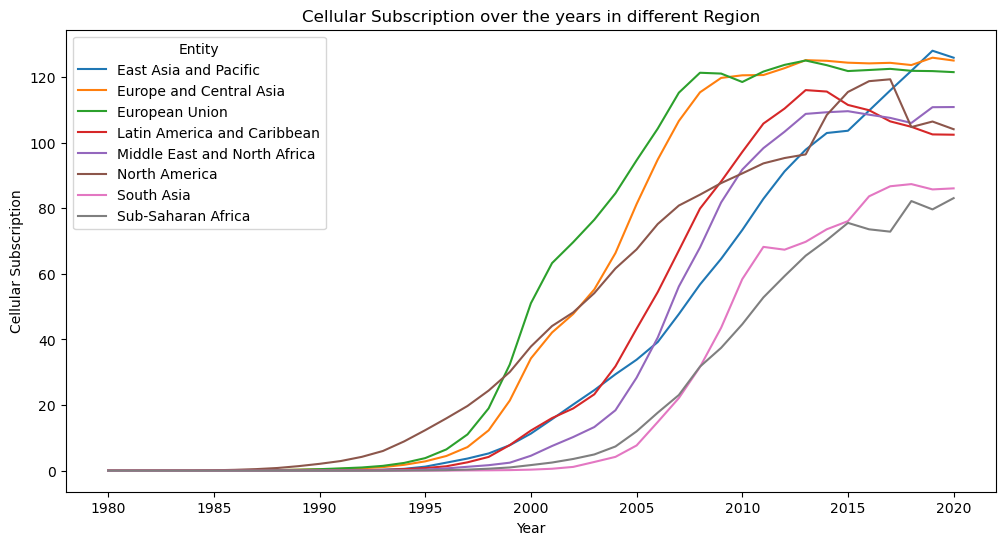

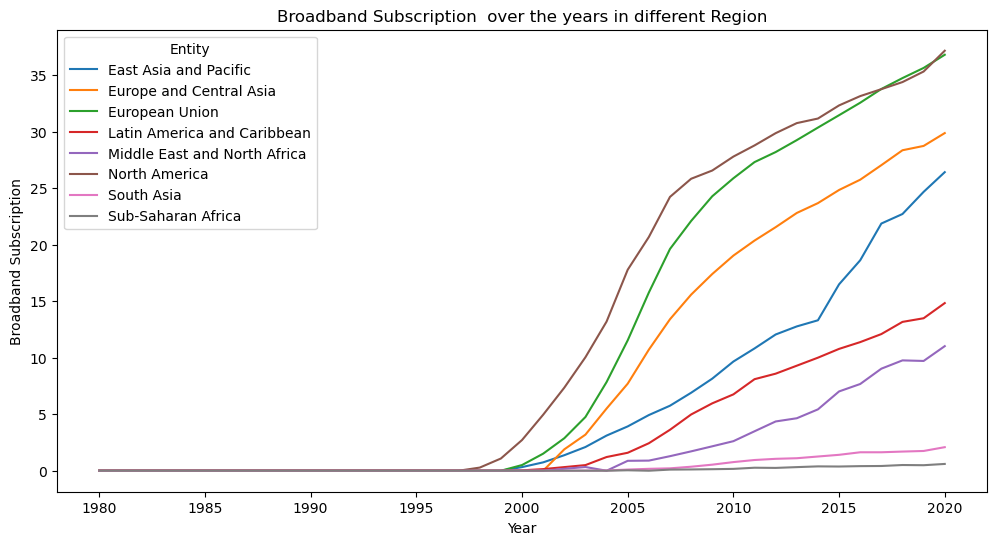

In [42]:
plt.figure(figsize=(12,6))
sns.lineplot(data = Region_df , x= 'Year', y='Internet Users(%)', hue='Entity')
plt.title('Internet user over the years in different Region')
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(data = Region_df , x= 'Year', y='Cellular Subscription', hue='Entity')
plt.title('Cellular Subscription over the years in different Region')
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(data = Region_df , x= 'Year', y='Broadband Subscription', hue='Entity')
plt.title('Broadband Subscription  over the years in different Region')
plt.show()

# User by different income aspect

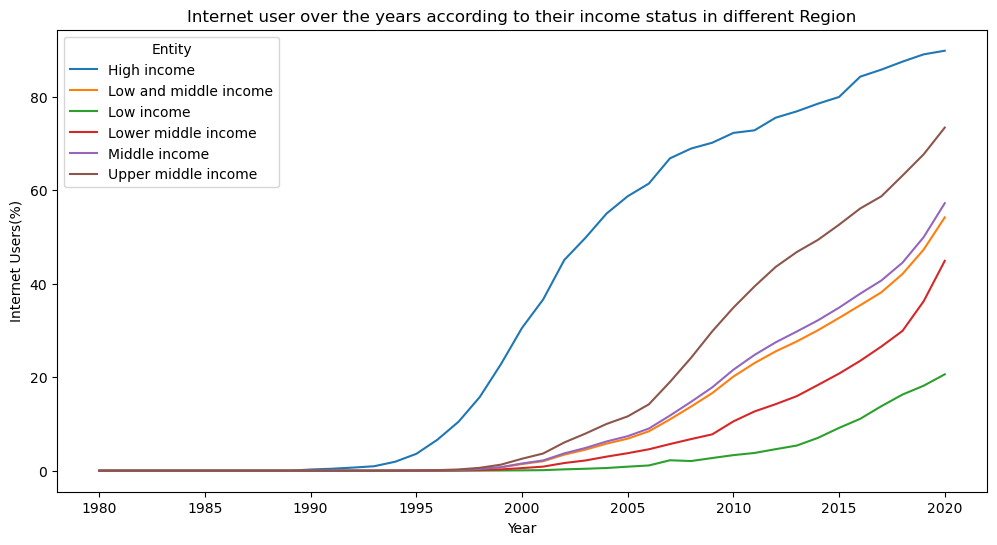

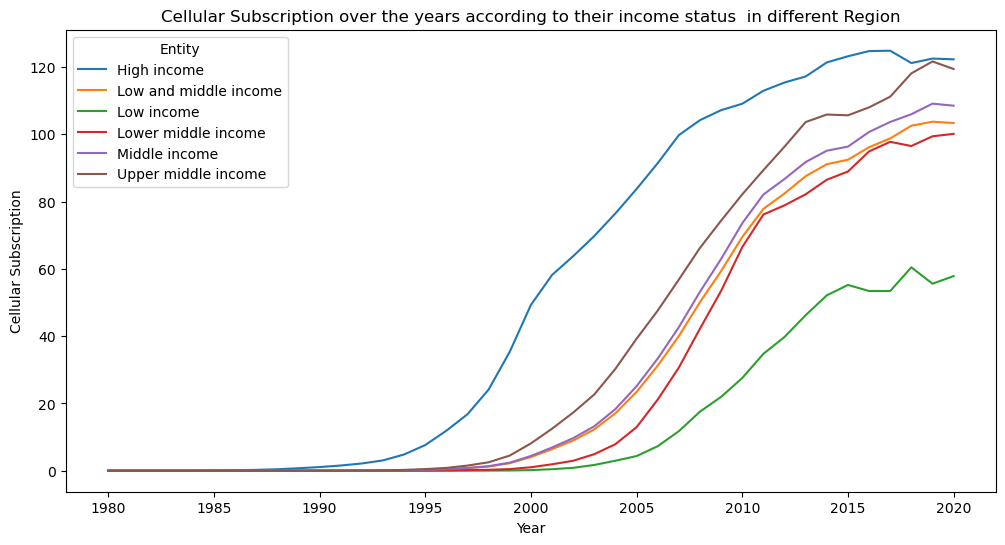

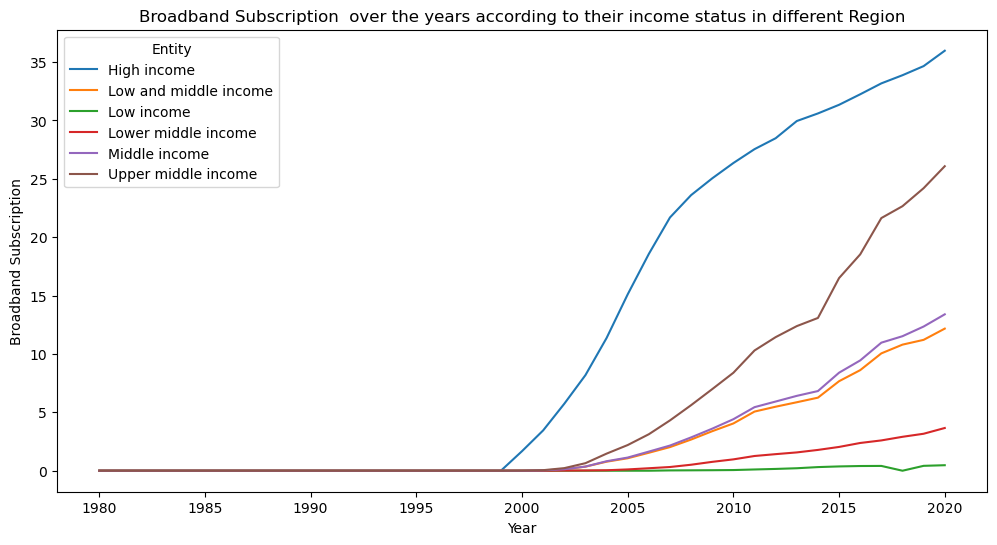

In [16]:
plt.figure(figsize=(12,6))
sns.lineplot(data =income_df  , x= 'Year', y='Internet Users(%)', hue='Entity')
plt.title('Internet user over the years according to their income status in different Region')
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(data = income_df  , x= 'Year', y='Cellular Subscription', hue='Entity')
plt.title('Cellular Subscription over the years according to their income status  in different Region')
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(data = income_df  , x= 'Year', y='Broadband Subscription', hue='Entity')
plt.title('Broadband Subscription  over the years according to their income status in different Region')
plt.show()

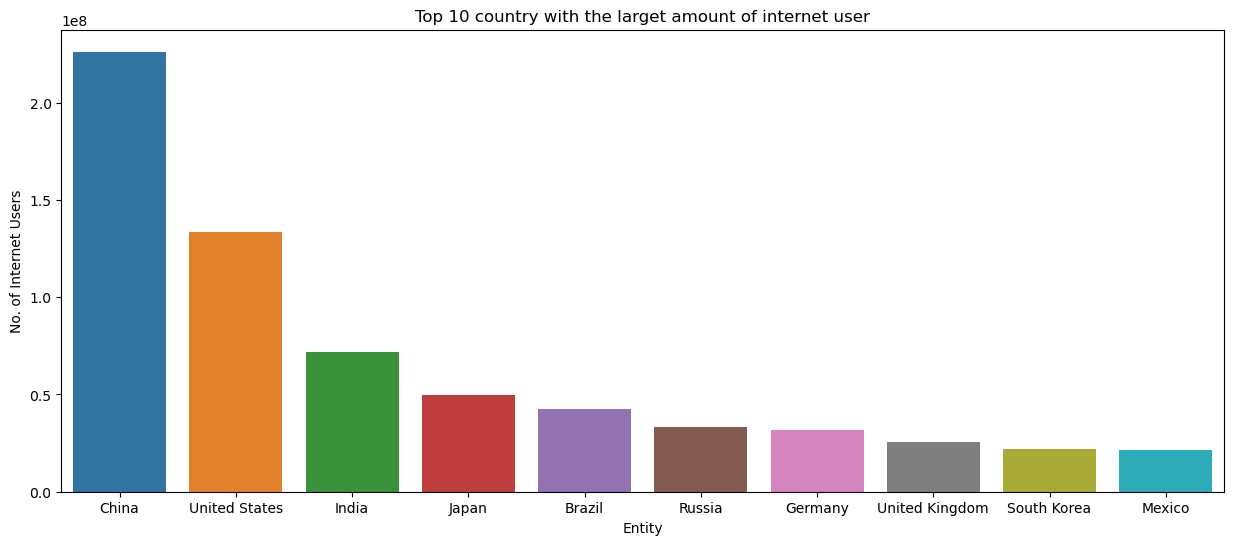

In [17]:

top_10_user=df.groupby('Entity') ['No. of Internet Users'].mean().round().nlargest(10).reset_index()
plt.figure(figsize=(15,6))
sns.barplot(data=top_10_user, x ='Entity', y ='No. of Internet Users')
plt.title('Top 10 country with the larget amount of internet user')
plt.show()

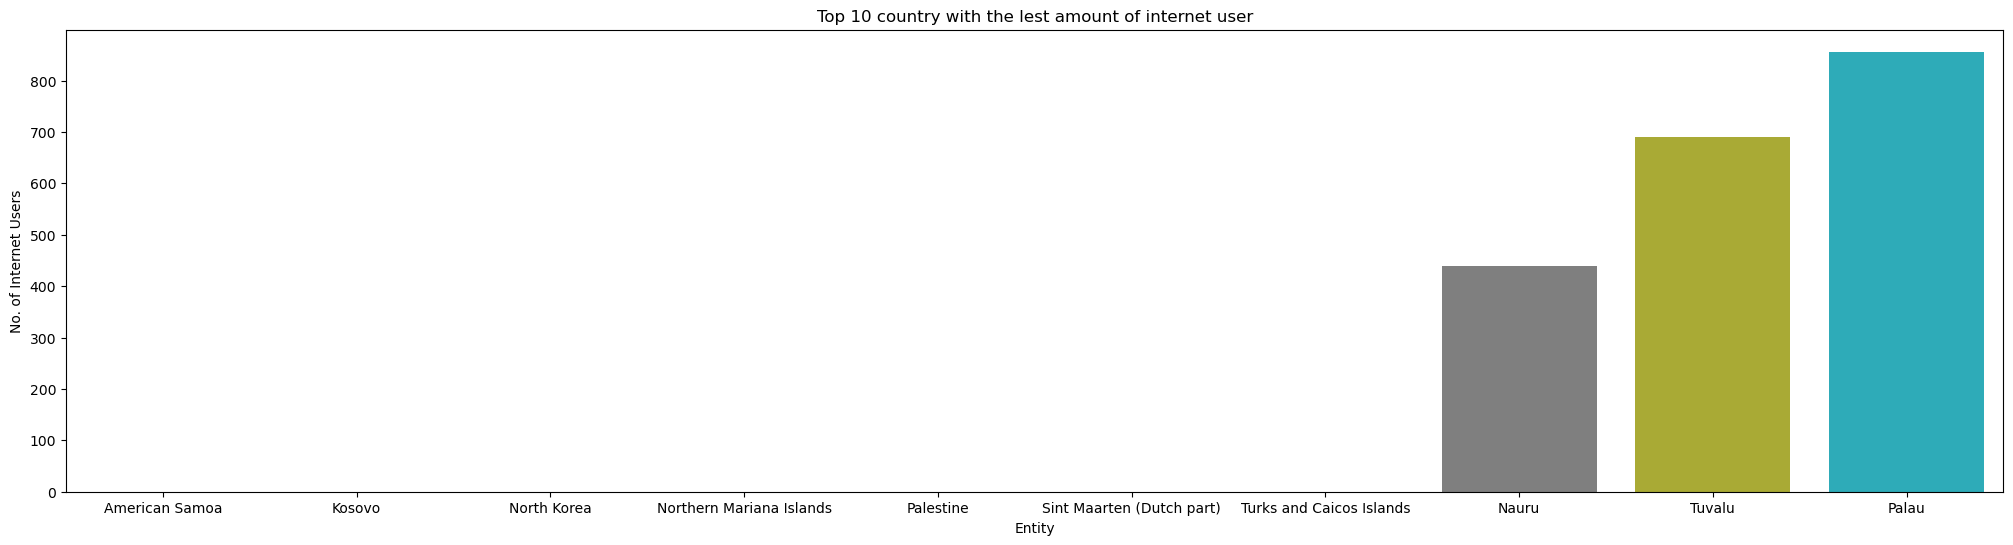

In [62]:
top_10_user=df.groupby('Entity') ['No. of Internet Users'].mean().round().nsmallest(10).reset_index() 
plt.figure(figsize=(25,6))
sns.barplot(data=top_10_user, x ='Entity', y ='No. of Internet Users')
plt.title('Top 10 country with the lest amount of internet user')
plt.show()

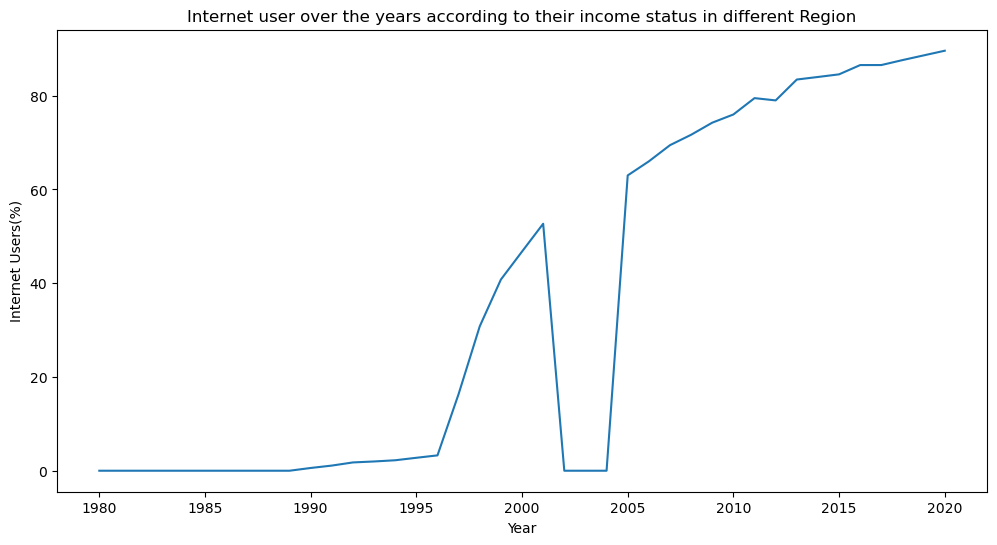

In [79]:
aus_value=df[df['Code']=='AUS']
plt.figure(figsize=(12,6))
sns.lineplot(data =aus_value, x= 'Year', y='Internet Users(%)')
plt.title('Internet user over the years according to their income status in different Region')
plt.show()